# Algunas técnicas de validación Cruzada

In [23]:
from sklearn import datasets
import pandas as pd
import numpy as np

X, y = datasets.load_iris(return_X_y=True)

### K-Fold

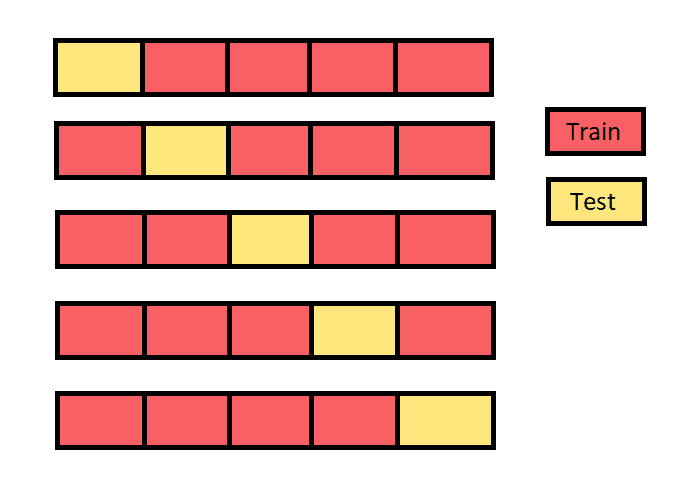

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

In [25]:
clf = DecisionTreeClassifier(random_state=42)

In [26]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds,scoring="accuracy") # cv = k_folds es opcional, por defecto es 3 pero se recomienda 5 o 10

#imprimir los scores y la media
print("Valores obtenidos: ", scores)
print("Media:", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [1.         1.         0.83333333 0.93333333 0.8       ]
Media: 0.9133333333333333
Número de CV usados:  5


### K-Fold estratificado

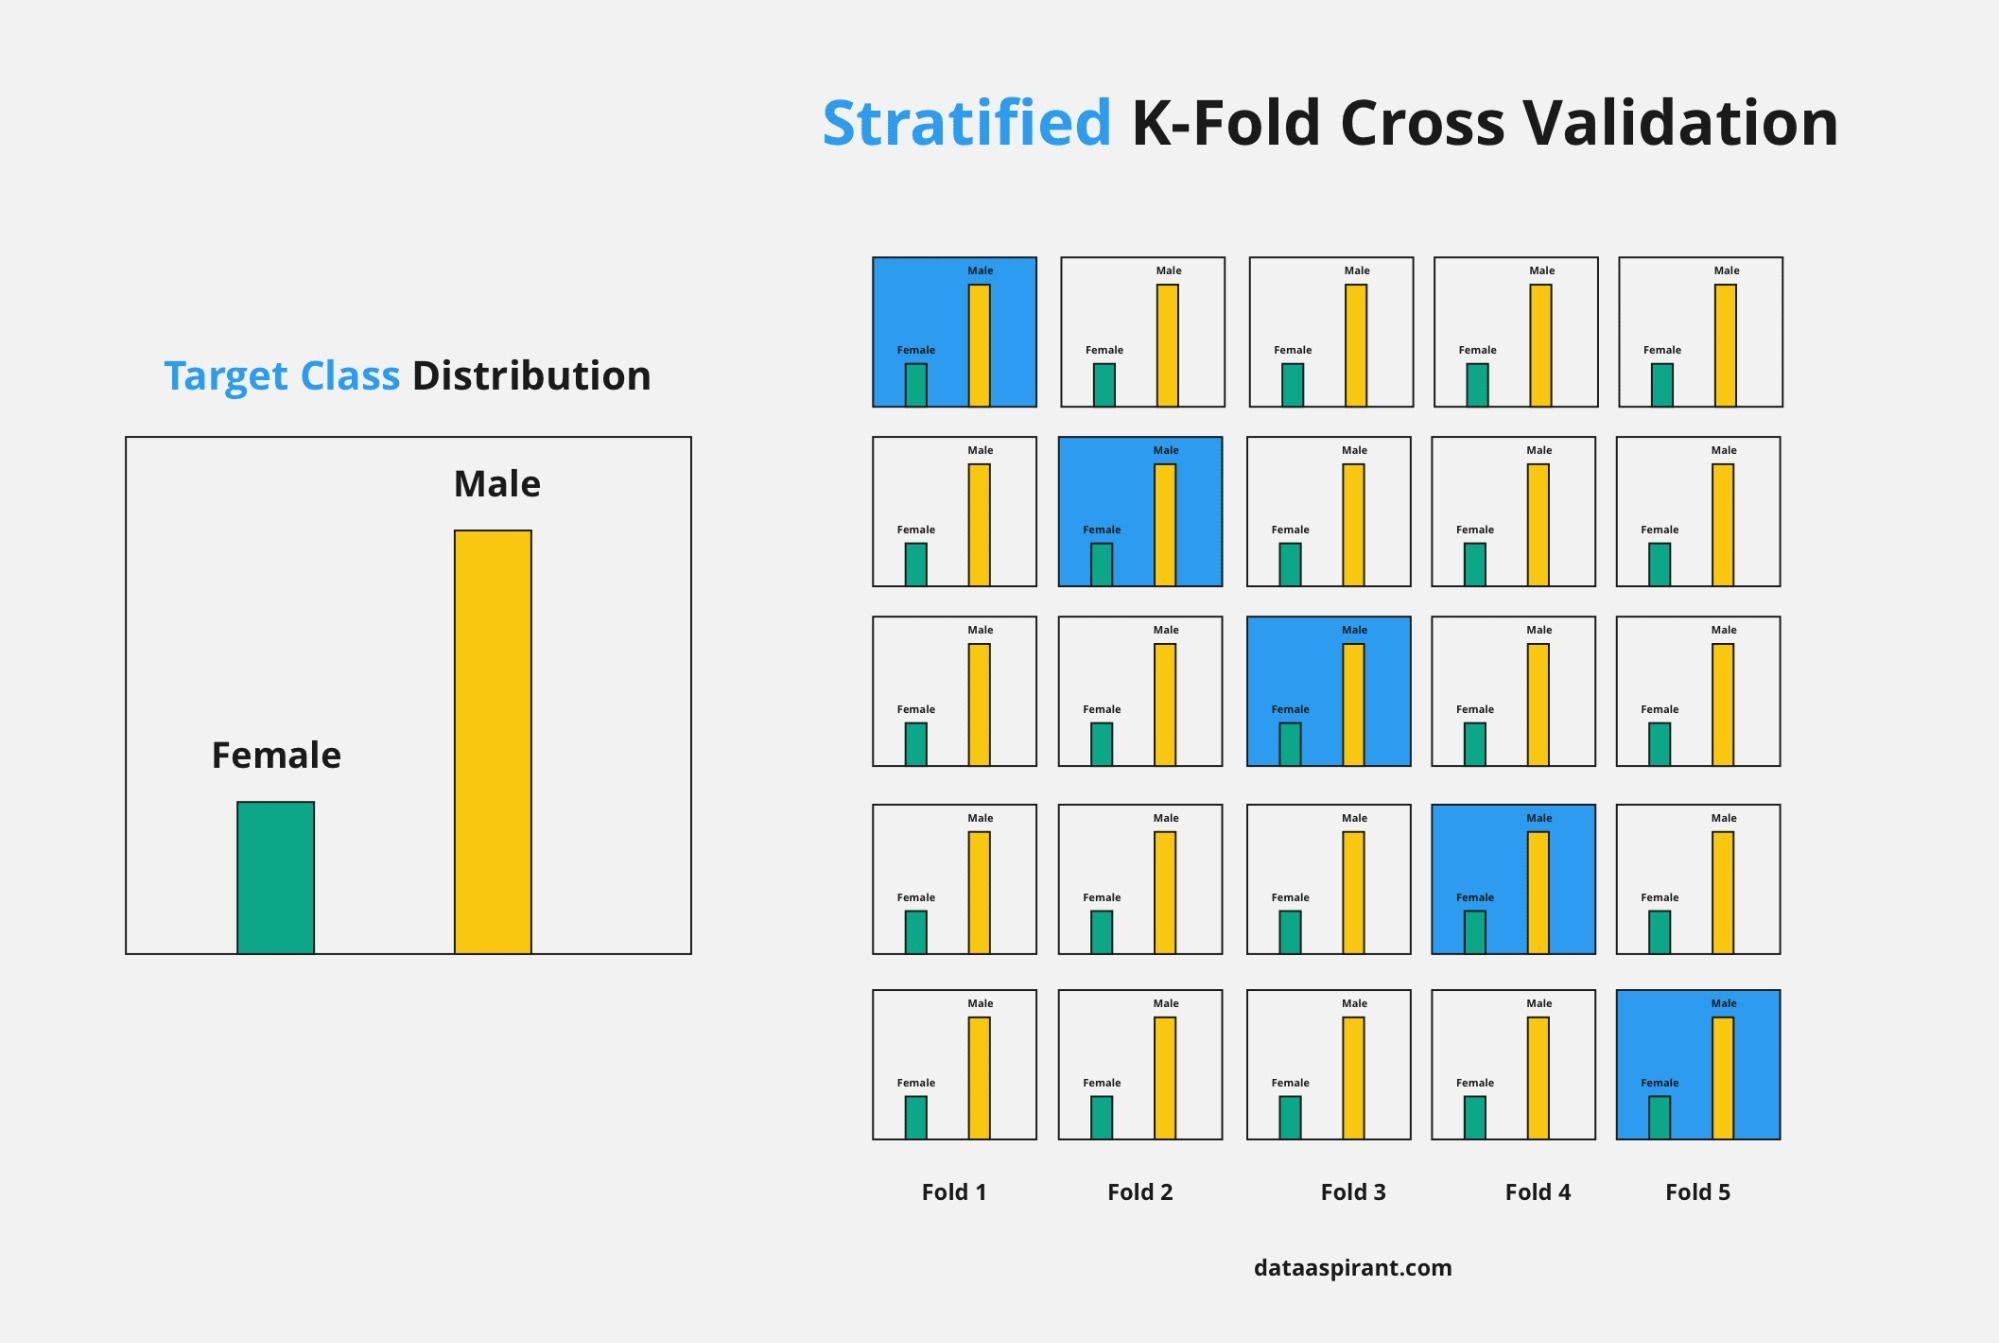

In [27]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 CV estratificados con shuffle y semilla 42

scores = cross_val_score(clf, X, y, cv=cv)

#imprimir los scores y la media
print("Valores obtenidos: ", scores)
print("Media:", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [1.         0.96666667 0.93333333 0.96666667 0.9       ]
Media: 0.9533333333333335
Número de CV usados:  5


### Dejar uno fuera: Leave-One-Out (LOO)

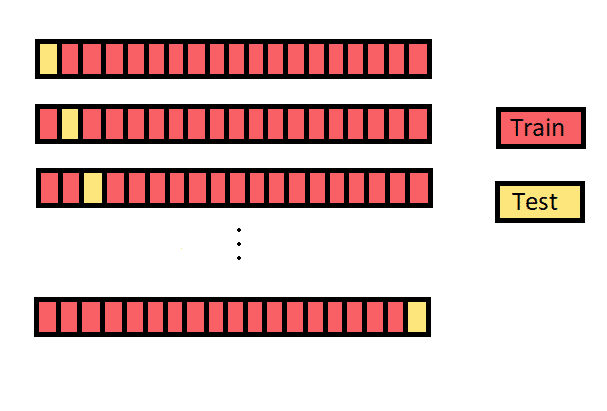

In [28]:
from sklearn import datasets
import numpy as np
X, y = datasets.load_iris(return_X_y=True)
np.shape(X)

(150, 4)

In [29]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Valores obtenidos: ", scores)
print("Media: ", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Media:  0.94
Número de CV usados:  150


### Leave-P-Out (LPO)

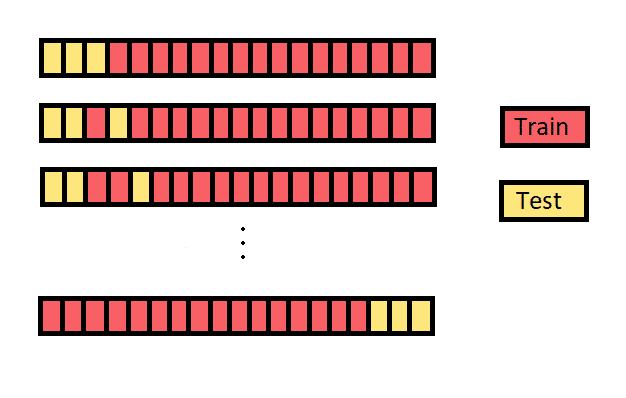

In [30]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=3) # p es el número de muestras de test que se van a usar.

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9385748836084405
Number of CV Scores used in Average:  551300


### División aleatoria - Shuffle split

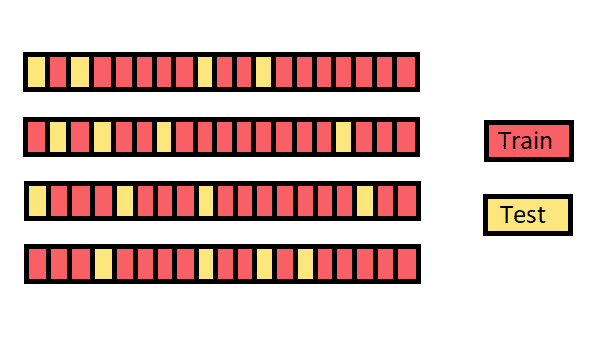

In [31]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.4, n_splits = 5) # 5 CV con 60% de train y 40% de test 

scores = cross_val_score(clf, X, y, cv = ss) 

#imprimir los scores y la media
print("Valores obtenidos: ", scores)
print("Media:", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [0.86666667 0.98333333 0.93333333 0.98333333 0.93333333]
Media: 0.9400000000000001
Número de CV usados:  5


### Validación Cruzada Estratificada Repeated K-Fold:

In [32]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42) #10 splits, 3 repeticiones y semilla 42

scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')


#imprimir los scores y la media
print("Valores obtenidos: ", scores)
print("Media:", scores.mean())
print("Número de CV usados: ", len(scores))

Valores obtenidos:  [1.         0.93333333 1.         0.93333333 0.86666667 0.86666667
 1.         0.93333333 0.93333333 0.86666667 0.93333333 0.93333333
 0.93333333 0.93333333 0.86666667 0.93333333 0.93333333 0.93333333
 0.93333333 1.         0.86666667 0.86666667 1.         0.93333333
 1.         1.         1.         0.93333333 0.93333333 1.        ]
Media: 0.94
Número de CV usados:  30


## Entrenamiento y evaluacicón de modelos con validación cruzada

In [33]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
iris = datasets.load_iris()
 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [34]:
np.shape(iris.data)

(150, 4)

In [35]:
kf = KFold(n_splits=5) # 5 folds 
 
clf = DecisionTreeClassifier(random_state=10,max_depth=2)
 
clf.fit(X_train, y_train) # entrenamos modelo

DecisionTreeClassifier(max_depth=2, random_state=10)

In [36]:
score = clf.score(X_train,y_train)
 
print("Metrica del modelo", score)
 
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring="accuracy") #cv 5 folds, el scoring por defecto es el accuracy pero se puede cambiar por f1, recall, precision, etc.  
 
print("Metricas cross_validation", scores)
 
print("Media de cross_validation", scores.mean())
 
preds = clf.predict(X_test)
 
score_pred = metrics.accuracy_score(y_test, preds)
 
print("Metrica en Test", score_pred)

Metrica del modelo 0.9583333333333334
Metricas cross_validation [0.91666667 0.91666667 0.95833333 1.         0.91666667]
Media de cross_validation 0.9416666666666667
Metrica en Test 0.9666666666666667
